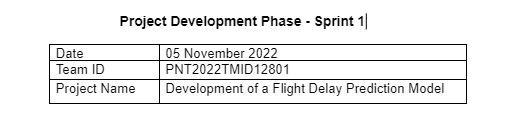

**Importing all the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

**Importing the dataset**

In [2]:
data=pd.read_csv("flightdata.csv")

In [3]:
data.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN
5,2016,1,1,1,5,DL,N936DL,1975,13487,MSP,...,1459,1441.0,-18.0,0.0,0.0,0.0,150.0,134.0,907.0,NaN
6,2016,1,1,2,6,DL,N983DL,2074,10397,ATL,...,1931,1920.0,-11.0,0.0,0.0,0.0,166.0,155.0,907.0,NaN
7,2016,1,1,2,6,DL,N589NW,2151,13487,MSP,...,1929,1908.0,-21.0,0.0,0.0,0.0,229.0,197.0,1399.0,NaN
8,2016,1,1,2,6,DL,N804DN,2221,13487,MSP,...,1305,1255.0,-10.0,0.0,0.0,0.0,230.0,220.0,1399.0,NaN
9,2016,1,1,2,6,DL,N965DN,2291,13487,MSP,...,1801,1800.0,-1.0,0.0,0.0,0.0,151.0,137.0,907.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
data=data.drop('Unnamed: 25',axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [7]:
data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


**Handling Missing Values**

In [8]:
data=data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11043 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11043 non-null  int64  
 1   QUARTER              11043 non-null  int64  
 2   MONTH                11043 non-null  int64  
 3   DAY_OF_MONTH         11043 non-null  int64  
 4   DAY_OF_WEEK          11043 non-null  int64  
 5   UNIQUE_CARRIER       11043 non-null  object 
 6   TAIL_NUM             11043 non-null  object 
 7   FL_NUM               11043 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11043 non-null  int64  
 9   ORIGIN               11043 non-null  object 
 10  DEST_AIRPORT_ID      11043 non-null  int64  
 11  DEST                 11043 non-null  object 
 12  CRS_DEP_TIME         11043 non-null  int64  
 13  DEP_TIME             11043 non-null  float64
 14  DEP_DELAY            11043 non-null  float64
 15  DEP_DEL15            11043 non-null 

**DATA VISUALIZATION**

Text(0.5, 1.0, 'Distribution of the Arrival Time')

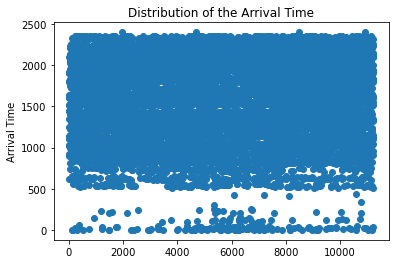

In [10]:
plt.scatter(data.index,data['ARR_TIME'])
plt.ylabel('Arrival Time')
plt.title('Distribution of the Arrival Time')

(array([ 989., 1487., 1340., 1382.,  924.,  957., 1058., 1111.,  987.,
         808.]),
 array([   7. ,  291.6,  576.2,  860.8, 1145.4, 1430. , 1714.6, 1999.2,
        2283.8, 2568.4, 2853. ]),
 <BarContainer object of 10 artists>)

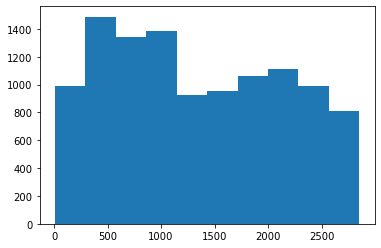

In [11]:
plt.hist(data['FL_NUM'])

In [12]:
columns=list(data.columns)

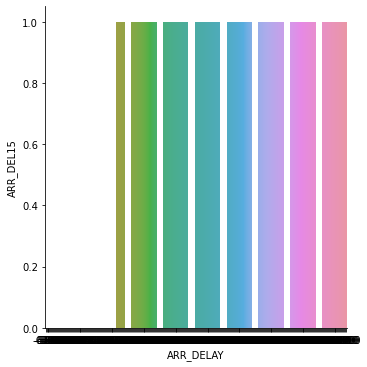

In [13]:
sns.catplot(x='ARR_DELAY',y='ARR_DEL15',data=data,kind='bar')

In [14]:
data['ARR_DEL15'].nunique()

2

In [15]:
for i in columns:
    try:
      skew1=data[i].skew()
      print("The skew of {} is {}".format(i,str(skew1)))
      if skew1 > 3:
        median = float(data[i].median())
        data[i] = np.where(data[i] > 0.45, median, data[i])
    except:
      print()

The skew of YEAR is 0
The skew of QUARTER is -0.07076578197761728
The skew of MONTH is -0.06478404626399789
The skew of DAY_OF_MONTH is -0.0039212208433480715
The skew of DAY_OF_WEEK is 0.02611051500245296


The skew of FL_NUM is 0.17421702805934322
The skew of ORIGIN_AIRPORT_ID is 0.1781563550685908

The skew of DEST_AIRPORT_ID is 0.20849436349039438

The skew of CRS_DEP_TIME is 0.06149721892776374
The skew of DEP_TIME is 0.03000709701894307
The skew of DEP_DELAY is 7.1602009024202795
The skew of DEP_DEL15 is 2.0463588064693035
The skew of CRS_ARR_TIME is -0.40688020169034556
The skew of ARR_TIME is -0.4130536257588298
The skew of ARR_DELAY is 5.898519655640514
The skew of ARR_DEL15 is 2.274840717112184
The skew of CANCELLED is 0
The skew of DIVERTED is 0
The skew of CRS_ELAPSED_TIME is 0.9028927753685997
The skew of ACTUAL_ELAPSED_TIME is 0.8903973027244532
The skew of DISTANCE is 0.7844649071893438


In [16]:
data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11043.0,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,...,11043.000000,11043.000000,11043.000000,11043.000000,11043.000000,11043.0,11043.0,11043.000000,11043.000000,11043.000000
mean,2016.0,2.548402,6.643847,15.813185,3.964774,1337.185276,12332.628271,12302.496785,1321.007154,1327.140723,...,0.142443,1537.425428,1524.224758,-14.226569,0.124513,0.0,0.0,190.595581,179.661233,1160.944490
std,0.0,1.091655,3.353072,8.789698,1.990953,810.832998,1596.321443,1602.485742,490.705288,500.631611,...,0.349520,502.495992,510.861392,8.687823,0.330181,0.0,0.0,78.425024,77.940399,643.830437
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,0.000000,2.000000,1.000000,-67.000000,0.000000,0.0,0.0,93.000000,75.000000,509.000000
25%,2016.0,2.000000,4.000000,8.000000,2.000000,629.000000,10397.000000,10397.000000,905.000000,905.000000,...,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.0,0.0,126.000000,117.000000,594.000000
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1287.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,0.000000,1559.000000,1546.000000,-10.000000,0.000000,0.0,0.0,159.000000,149.000000,907.000000
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,0.000000,1952.000000,1944.000000,-10.000000,0.000000,0.0,0.0,255.000000,236.000000,1927.000000
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,1.000000,2359.000000,2400.000000,0.000000,1.000000,0.0,0.0,397.000000,428.000000,2422.000000


**Dropping off unnecessary columns**

In [17]:
data.corr()['ARR_DEL15']

YEAR                        NaN
QUARTER                0.023102
MONTH                  0.030161
DAY_OF_MONTH          -0.000597
DAY_OF_WEEK           -0.012063
FL_NUM                -0.002378
ORIGIN_AIRPORT_ID     -0.006250
DEST_AIRPORT_ID        0.029525
CRS_DEP_TIME           0.086057
DEP_TIME               0.127593
DEP_DELAY              0.200721
DEP_DEL15              0.658511
CRS_ARR_TIME           0.078282
ARR_TIME               0.042298
ARR_DELAY              0.183476
ARR_DEL15              1.000000
CANCELLED                   NaN
DIVERTED                    NaN
CRS_ELAPSED_TIME       0.015676
ACTUAL_ELAPSED_TIME    0.077741
DISTANCE               0.002870
Name: ARR_DEL15, dtype: float64

<AxesSubplot:>

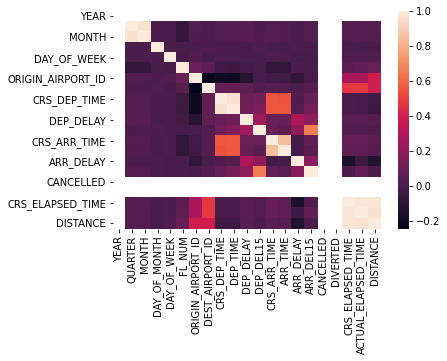

In [18]:
sns.heatmap(data.corr())

In [19]:
new_data=data.drop(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','FL_NUM','YEAR','CANCELLED','DIVERTED','DISTANCE','DAY_OF_MONTH','QUARTER','MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','TAIL_NUM'],axis=1)

In [20]:
new_data.head()

,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME
0,ATL,SEA,1905,1907.0,-1.0,0.0,2143,2102.0,-41.0,0.0,338.0,295.0
1,DTW,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,-10.0,0.0,110.0,115.0
2,ATL,SEA,940,942.0,-1.0,0.0,1215,1142.0,-33.0,0.0,335.0,300.0
3,SEA,MSP,819,820.0,-1.0,0.0,1335,1345.0,-10.0,0.0,196.0,205.0
4,SEA,DTW,2300,2256.0,-4.0,0.0,607,615.0,-10.0,0.0,247.0,259.0


**Label Encoding**

In [21]:
cities=new_data['ORIGIN'].unique()

In [22]:
cities

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [23]:
new_data['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [24]:
city_map={cities[i]:i for i in range(0,len(cities))}

In [25]:
city_map

{'ATL': 0, 'DTW': 1, 'SEA': 2, 'MSP': 3, 'JFK': 4}

In [26]:
def encode(c):
  return city_map[c]

In [27]:
new_data['ORIGIN']=new_data['ORIGIN'].apply(encode)

In [28]:
new_data['DEST']=new_data['DEST'].apply(encode)

In [29]:
new_data.head()

,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME
0,0,2,1905,1907.0,-1.0,0.0,2143,2102.0,-41.0,0.0,338.0,295.0
1,1,3,1345,1344.0,-1.0,0.0,1435,1439.0,-10.0,0.0,110.0,115.0
2,0,2,940,942.0,-1.0,0.0,1215,1142.0,-33.0,0.0,335.0,300.0
3,2,3,819,820.0,-1.0,0.0,1335,1345.0,-10.0,0.0,196.0,205.0
4,2,1,2300,2256.0,-4.0,0.0,607,615.0,-10.0,0.0,247.0,259.0


In [30]:
new_data.corr()['ARR_DEL15']

ORIGIN                 0.034813
DEST                   0.039938
CRS_DEP_TIME           0.086057
DEP_TIME               0.127593
DEP_DELAY              0.200721
DEP_DEL15              0.658511
CRS_ARR_TIME           0.078282
ARR_TIME               0.042298
ARR_DELAY              0.183476
ARR_DEL15              1.000000
CRS_ELAPSED_TIME       0.015676
ACTUAL_ELAPSED_TIME    0.077741
Name: ARR_DEL15, dtype: float64

In [31]:

data.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
UNIQUE_CARRIER         0
TAIL_NUM               0
FL_NUM                 0
ORIGIN_AIRPORT_ID      0
ORIGIN                 0
DEST_AIRPORT_ID        0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DEL15              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DEL15              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
DISTANCE               0
dtype: int64

In [32]:
data=data[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
data.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_ARR_TIME    0
DEP_DEL15       0
ARR_DEL15       0
dtype: int64

In [33]:
data=data.fillna({'ARR_DEL15': 1})
data=data.fillna({'DEP_DEL15': 0})
data.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
185,589,1,10,7,MSP,SEA,1100,0.0,0.0
186,744,1,10,7,MSP,ATL,1334,0.0,0.0
187,789,1,10,7,SEA,MSP,1837,0.0,0.0


In [34]:
import math

for index, row in data.iterrows():
  data.loc[index,'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [35]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
data['DEST'] = le.fit_transform(data['DEST'])
data['ORIGIN'] = le.fit_transform(data['ORIGIN'])

In [36]:
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [37]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(data['ORIGIN'].values.reshape(-1,1)).toarray()
t=oh.fit_transform(data['DEST'].values.reshape(-1,1)).toarray()

In [38]:
data=pd.get_dummies(data,columns=['ORIGIN','DEST'])

In [39]:
data['ARR_DEL15'].value_counts()

0.0    9668
1.0    1375
Name: ARR_DEL15, dtype: int64

In [40]:
data.tail()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
11226,1715,12,30,5,12,0.0,0.0,0,1,0,0,0,1,0,0,0,0
11227,1770,12,30,5,20,1.0,0.0,0,0,0,0,1,0,0,0,1,0
11228,1823,12,30,5,22,0.0,0.0,0,1,0,0,0,0,0,0,0,1
11229,1901,12,30,5,18,0.0,0.0,1,0,0,0,0,0,0,0,0,1
11230,2005,12,30,5,9,0.0,0.0,1,0,0,0,0,0,1,0,0,0


**Split the data into dependent and independent variables**


In [41]:
x=data[[i for i in data.columns if i!='ARR_DEL15']].values
y=data[[i for i in data.columns if i=='ARR_DEL15']].values

In [42]:
x.shape

(11043, 16)

In [43]:
y.shape

(11043, 1)

# SPRINT-2

**TRAIN-TEST-SPLIT**

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
x_test.shape

(2209, 16)

In [46]:
x_train.shape

(8834, 16)

In [47]:
y_test.shape

(2209, 1)

In [48]:
y_train.shape

(8834, 1)

**STANDARDIZING INPUT VALUES**

In [49]:
sc = StandardScaler()

In [50]:
x_train=sc.fit_transform(x_train)

In [51]:
x_test=sc.fit_transform(x_test)

**MODEL BUILDING**

In [52]:
classifier = DecisionTreeClassifier(random_state=0)

In [53]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
predicted = classifier.predict(x_test)

**MODEL EVALUATION**

In [55]:
acc=accuracy_score(predicted,y_test)

In [56]:
acc

0.8791308284291535

In [57]:
data[data['ARR_DEL15']>0].iloc[33].values

array([1.187e+03, 1.000e+00, 1.500e+01, 5.000e+00, 1.900e+01, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

In [58]:
sample=[[1.187e+03, 1.000e+00, 1.500e+01, 5.000e+00, 1.900e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]]

In [59]:
classifier.predict(sample)

array([0.])

**SAVING THE MODEL**

In [60]:
pickle.dump(classifier,open('flightdelay.pk1','wb'))